In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/solar_weather.csv")

In [ ]:
df

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [ ]:
df.drop(['hour','month','SunlightTime/daylength'], axis=1,inplace=True)

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour

In [ ]:
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['second'] = df['Time'].dt.second

# Drop the original 'Time' column which are date time objects
df = df.drop('Time', axis=1)

<Axes: >

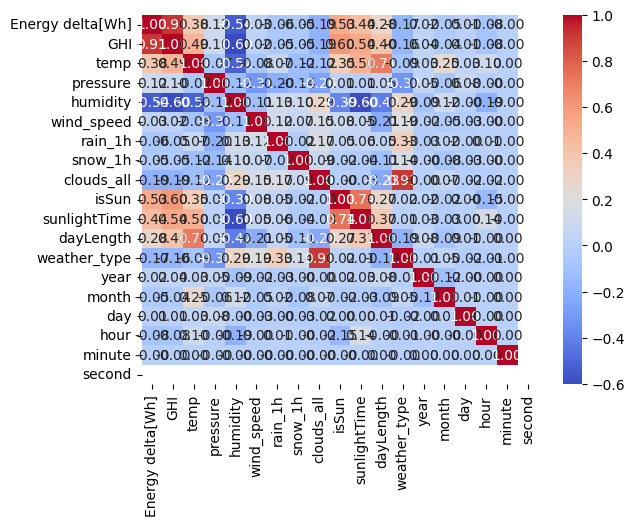

In [ ]:
# get correlations for all columns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
# form the correlation variable created above let's get the top 3 (using absolute value to get either positive or negative) correlations with Energy delta
corr[['Energy delta[Wh]']].abs().sort_values(by='Energy delta[Wh]', axis=0, ascending=False)

,Energy delta[Wh]
Energy delta[Wh],1.000000
GHI,0.914619
humidity,0.544407
isSun,0.526952
sunlightTime,0.437296
temp,0.378554
dayLength,0.280695
clouds_all,0.190241
weather_type,0.170046
pressure,0.115219


In [ ]:
df=df.drop(['day','minute','second'],axis=1)

In [ ]:
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,weather_type,year,month,hour
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,3.198398,2019.345042,6.298329,11.498902
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,1.289939,1.636537,3.376066,6.921887
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,1.000000,2017.000000,1.000000,0.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,2.000000,2018.000000,3.000000,5.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,4.000000,2019.000000,6.000000,11.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,4.000000,2021.000000,9.000000,17.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,5.000000,2022.000000,12.000000,23.000000


In [ ]:
df.shape

(196776, 16)

In [ ]:
df

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,weather_type,year,month,hour
0,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,4,2017,1,0
1,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,4,2017,1,0
2,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,4,2017,1,0
3,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,4,2017,1,0
4,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,4,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,3,2022,8,16
196772,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,3,2022,8,17
196773,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,3,2022,8,17
196774,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,3,2022,8,17


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score



In [ ]:
X = df.drop('Energy delta[Wh]', axis = 1)
y = df['Energy delta[Wh]'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=X['month'])
print('# train X:',len(X_train),'# test X:',len(X_test),'# train y:',len(y_train),'# test y:',len(y_test))

# train X: 137743 # test X: 59033 # train y: 137743 # test y: 59033


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
'''
Function to perform regressions, accuracy calculations and plots
'''
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

def regression_calculations(X_train, y_train, X_test, y_test, regressor):

    regr = regressor.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    # store the orignial and predicted value in a dataframe
    df_final = pd.DataFrame(data={'Predictions':y_pred, 'Actuals':y_test })
    df_final.plot(alpha=0.5) # reduce opacity to see both lines
    plt.title(regressor, fontsize=30)
    plt.ylabel('Energy Delta')
    print('Accuragy for                                     ',regressor, ' = {:.4f}'.format(regr.score(X_test, y_test)))
    print('The Coefficient of determination (R-squared) for ',regressor, ' = {:.2f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
    print('The mean absolute error (MAE) for                ',regressor, ' = {:.2f}'.format(mean_absolute_error( df_final['Actuals'],df_final['Predictions'])))
    print('The RMSE error (RMSE) for                        ',regressor, ' = {:.2f}'.format(mean_squared_error( df_final['Actuals'],df_final['Predictions']), squared=False))


    print('\n\n')


In [ ]:
# define the different regressors
regressors = [LinearRegression(), DecisionTreeRegressor(), linear_model.Lasso(), GradientBoostingRegressor()]
# RandomForestRegressor()


Accuragy for                                      LinearRegression()  = 0.8517
The Coefficient of determination (R-squared) for  LinearRegression()  = 0.85
The mean absolute error (MAE) for                 LinearRegression()  = 235.53
The RMSE error (RMSE) for                         LinearRegression()  = 161913.63



Accuragy for                                      DecisionTreeRegressor()  = 0.8711
The Coefficient of determination (R-squared) for  DecisionTreeRegressor()  = 0.87
The mean absolute error (MAE) for                 DecisionTreeRegressor()  = 146.20
The RMSE error (RMSE) for                         DecisionTreeRegressor()  = 140717.29



Accuragy for                                      Lasso()  = 0.8516
The Coefficient of determination (R-squared) for  Lasso()  = 0.85
The mean absolute error (MAE) for                 Lasso()  = 234.56
The RMSE error (RMSE) for                         Lasso()  = 161958.55



Accuragy for                                      GradientBoosti

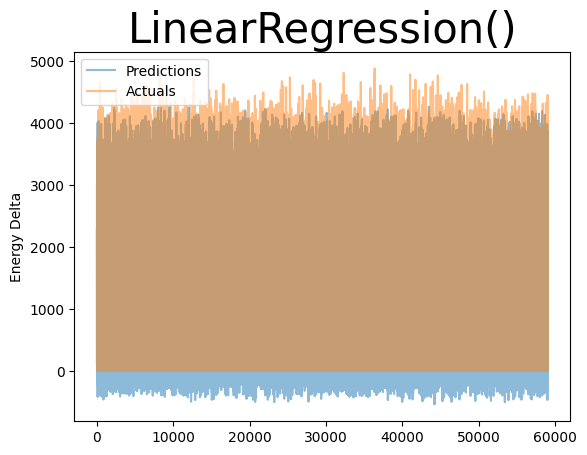

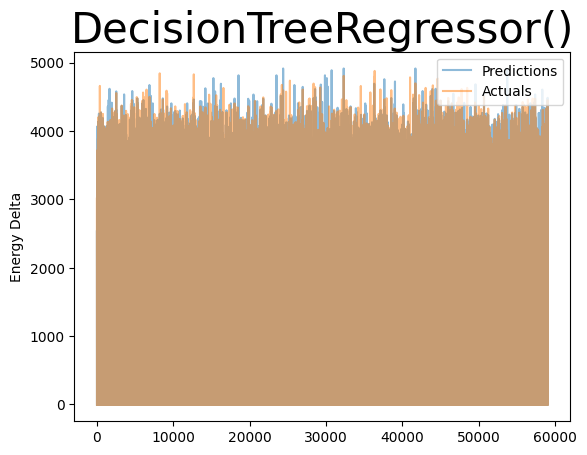

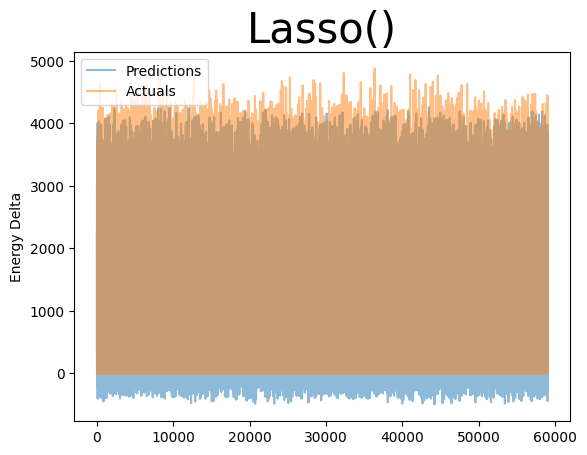

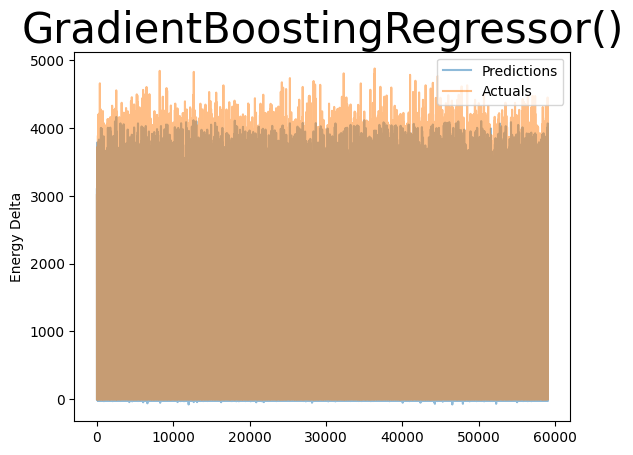

In [ ]:
#loop through the different regressors
for regressor in regressors:
    pred = regression_calculations(X_train, y_train, X_test, y_test, regressor)
